In [2]:
from pycalphad import Database, variables as v
from espei.datasets import recursive_glob, load_datasets
from espei.plot import dataplot
from tinydb import where, Query
import matplotlib.pyplot as plt

['FE,NI_225_CF4', 'LAVES_PHASE_C14', 'BCC_A2']
['FCC_A1', 'BCC_A2', 'LAVES_PHASE_C14']
['LIQUID', 'BCC_A2', 'LAVES_PHASE_C14', 'MU_PHASE', 'BCC_A2']
['BCC_A2', 'FE,NI_225_CF4', 'LAVES_PHASE_C14', 'LIQUID']
['BCC_A2', 'FCC_A1']
['MU_PHASE', 'LAVES_PHASE_C14', 'LIQUID', 'BCC_A2']
['LAVES_PHASE_C14', 'BCC_A2', 'FCC_A1', 'LIQUID', 'MU_PHASE']
['BCC_A2', 'LIQUID', 'MU_PHASE']
['EXP']
['EXP']
['EXP']
['FE,NI_225_CF4', 'LAVES_PHASE_C14', 'BCC_A2', 'FCC_A1', 'LIQUID', 'MU_PHASE', 'EXP']


<AxesSubplot:title={'center':'Fe-Nb'}, xlabel='X(NB)', ylabel='Temperature (K)'>

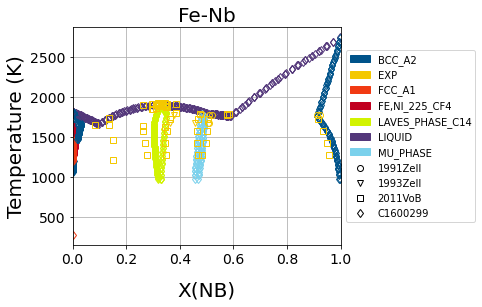

In [3]:

comps = ['FE', 'NB','VA']
#phases = list(dbf.phases.keys())
#print(phases)
conds = {v.N: 1.0, v.P: 101325, v.T: (300, 4000, 20), v.X('NB'): (0, 1, 0.02)}
datasets = load_datasets(recursive_glob('.','*.json'))

datasets.update({'reference':'MPDS'},Query().reference.search('C10'))
for records in datasets:
    '''
    if records['reference']!='MPDS':
        records['phases']=['EXP']
        print('S=',records)
        #for i in range(len(records['conditions']['T'])):
         #   records['conditions']['T'][i]=records['conditions']['T'][i]+273
        
        for i in range(len(records['values'])):
            print('N=',records['values'][i])
            for j in range(len(records['values'][i])):
                records['values'][i][j][0] = 'EXP'
        #print('Y=',records)
    '''    
    a=records['phases']
    records['phases']=['R_PHASE' if o=='MO0.38FE0.62_148_HR159' else o for o in records['phases']]
    records['phases']=['FCC_A1' if o=='FE_PURE' else o for o in records['phases']]
    records['phases']=['MU_PHASE' if o=='NB6.5FE6.5_166_HR39' else o for o in records['phases']]
    records['phases']=['LIQUID' if o=='L' else o for o in records['phases']]
    records['phases']=['SIGMA' if o=='MO0.5FE0.5_136_TP30' else o for o in records['phases']]
    records['phases']=['FCC_A1' if o=='CR0.28NI0.72_225_CF4' or o=='FCC' else o for o in records['phases']]
    records['phases']=['LAVES_PHASE_C14' if o=='NBFE2_194_HP12' else o for o in records['phases']]
    records['phases']=['BCC_A2' if o=='NB_229_CI2'or o=='NB0.002FE0.998_229_CI2' else o for o in records['phases']]
    datasets.update({'phases':records['phases']},where('phases')==a)
    print(records['phases'])
    for i in range(len(records['values'])):
        for j in range(len(records['values'][i])):
            records['values'][i][j] = ['R_PHASE' if o=='MO0.38FE0.62_148_HR159'  else o for o in records['values'][i][j]]
            records['values'][i][j] = ['FCC_A1' if o=='FE_PURE' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['MU_PHASE' if o=='NB6.5FE6.5_166_HR39'  else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LIQUID' if o=='L' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['SIGMA' if o=='MO0.5FE0.5_136_TP30' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['FCC_A1' if o=='CR0.28NI0.72_225_CF4'or o=='FCC' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LAVES_PHASE_C14' if o=='NBFE2_194_HP12' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['BCC_A2' if o=='NB_229_CI2' or o=='NB0.002FE0.998_229_CI2' else o for o in records['values'][i][j]]
phases_1 = [r['phases'] for r in datasets]
phases_db = []
for i in phases_1:
    for j in i:
        if j not in phases_db:
            phases_db.append(j)
#phases_db.append('EXP')
print(phases_db)
dataplot(comps, phases_db, conds,datasets,tielines=False)

#plt.ylim(1000,2000)
#plt.xlim(0.0,0.04)